In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Importe o dataset 

In [4]:
mnist = datasets.load_digits()
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

### Divida o conjunto de dados em treino e teste. Para isso utilize o módulo train_test_split do scikit learn 


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.25, random_state=42)

In [7]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [8]:
print("training data points: {}".format(len(trainLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
testing data points: 450


### Inicialize os valores de k para o classificador KNN juntamente com uma lista para armazenar os valores da acurácia

In [9]:
kVals = range(1, 30, 2)
accuracies = []

### Utilize o KNeighborsClassifier do scikit learn para criar o seu classificador
https://scikit-learn.org/stable/modules/neighbors.html

In [10]:
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(trainData, trainLabels)
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


### Imprima em um gráfico os valores da acurácia em função de k

[0, 30, 0.9, 1.0]

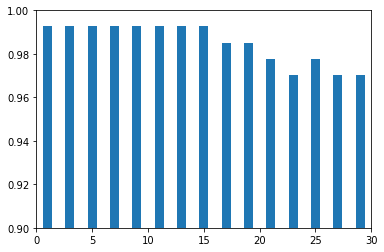

In [11]:
%matplotlib inline

plt.bar(kVals, height=accuracies)
plt.axis([0,30,0.9,1.0])

### Avaliação : Escolha o k com a melhor acurácia e avalie  o modelo utilizando as métricas de classificação disponíveis no scikit-learn

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

* confusion_matrix
* accuracy_score
* f1_score
* etc

In [38]:
model = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
model.fit(trainData, trainLabels)
y_predito = model.predict(testData)
score = model.score(valData, valLabels)
print("Utilizando a distância métrica euclidiana.")
print("Este é o valor do score: " + str(score) + ".")

print("Esta é a matriz de confusão: ")
print(confusion_matrix(testLabels, y_predito))

print("Este é o valor da acurácia: " + str(accuracy_score(testLabels, y_predito, normalize=True)) + ".")

print("Este é o valor do f1 score utilizando o average micro: " + str(f1_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor do f1 score utilizando o average macro: " + str(f1_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor do f1 score utilizando o average weighted: " + str(f1_score(testLabels, y_predito, average='weighted')) + ".")

print("Este é o valor da precisao utilizando o average micro: " + str(precision_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor da precisao utilizando o average macro: " + str(precision_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor da precisao utilizando o average weighted: " + str(precision_score(testLabels, y_predito, average='weighted')) + ".")

print("Este é o valor do recall utilizando o average micro: " + str(recall_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor do recall utilizando o average macro: " + str(recall_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor do recall utilizando o average weighted: " + str(recall_score(testLabels, y_predito, average='weighted')) + ".")

Utilizando a distância métrica euclidiana.
Este é o valor do score: 0.9925925925925926.
Esta é a matriz de confusão: 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 56  1  0  0  2]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  2  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  1  0 46]]
Este é o valor da acurácia: 0.9822222222222222.
Este é o valor do f1 score utilizando o average micro: 0.9822222222222222.
Este é o valor do f1 score utilizando o average macro: 0.9823508570489853.
Este é o valor do f1 score utilizando o average weighted: 0.9821730158383079.
Este é o valor da precisao utilizando o average micro: 0.9822222222222222.
Este é o valor da precisao utilizando o average macro: 0.9816931741130827.
Este é o valor da precisao utilizando o average weighted: 0.9824133289121848.
Este é o valor do recall utilizando o average m

### Modifique o parâmetro metric do classficiador e avalie outras distâncias métricas disponíveis

In [39]:
model = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
model.fit(trainData, trainLabels)
y_predito = model.predict(testData)
score = model.score(valData, valLabels)
print("Utilizando a distância métrica de manhattan.")
print("Este é o valor do score: " + str(score) + ".")

print("Esta é a matriz de confusão: ")
print(confusion_matrix(testLabels, y_predito))

print("Este é o valor da acurácia: " + str(accuracy_score(testLabels, y_predito, normalize=True)) + ".")

print("Este é o valor do f1 score utilizando o average micro: " + str(f1_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor do f1 score utilizando o average macro: " + str(f1_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor do f1 score utilizando o average weighted: " + str(f1_score(testLabels, y_predito, average='weighted')) + ".")

print("Este é o valor da precisao utilizando o average micro: " + str(precision_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor da precisao utilizando o average macro: " + str(precision_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor da precisao utilizando o average weighted: " + str(precision_score(testLabels, y_predito, average='weighted')) + ".")

print("Este é o valor do recall utilizando o average micro: " + str(recall_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor do recall utilizando o average macro: " + str(recall_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor do recall utilizando o average weighted: " + str(recall_score(testLabels, y_predito, average='weighted')) + ".")

Utilizando a distância métrica de manhattan.
Este é o valor do score: 0.9925925925925926.
Esta é a matriz de confusão: 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  1  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 56  1  0  0  2]
 [ 1  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  3  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  1  0  2  0 45]]
Este é o valor da acurácia: 0.9711111111111111.
Este é o valor do f1 score utilizando o average micro: 0.9711111111111111.
Este é o valor do f1 score utilizando o average macro: 0.9703206138020221.
Este é o valor do f1 score utilizando o average weighted: 0.9711161860220437.
Este é o valor da precisao utilizando o average micro: 0.9711111111111111.
Este é o valor da precisao utilizando o average macro: 0.969833354372828.
Este é o valor da precisao utilizando o average weighted: 0.9715693434377645.
Este é o valor do recall utilizando o average 

In [40]:
model = KNeighborsClassifier(n_neighbors=15, metric='chebyshev')
model.fit(trainData, trainLabels)
y_predito = model.predict(testData)
score = model.score(valData, valLabels)
print("Utilizando a distância métrica de chebyshev.")
print("Este é o valor do score: " + str(score) + ".")

print("Esta é a matriz de confusão: ")
print(confusion_matrix(testLabels, y_predito))

print("Este é o valor da acurácia: " + str(accuracy_score(testLabels, y_predito, normalize=True)) + ".")

print("Este é o valor do f1 score utilizando o average micro: " + str(f1_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor do f1 score utilizando o average macro: " + str(f1_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor do f1 score utilizando o average weighted: " + str(f1_score(testLabels, y_predito, average='weighted')) + ".")

print("Este é o valor da precisao utilizando o average micro: " + str(precision_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor da precisao utilizando o average macro: " + str(precision_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor da precisao utilizando o average weighted: " + str(precision_score(testLabels, y_predito, average='weighted')) + ".")

print("Este é o valor do recall utilizando o average micro: " + str(recall_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor do recall utilizando o average macro: " + str(recall_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor do recall utilizando o average weighted: " + str(recall_score(testLabels, y_predito, average='weighted')) + ".")

Utilizando a distância métrica de chebyshev.
Este é o valor do score: 0.9777777777777777.
Esta é a matriz de confusão: 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  1  0]
 [ 0  0  1 45  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 58  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  2  0  0  0  0  0  0 36  0]
 [ 0  0  0  1  0  1  0  1  1 44]]
Este é o valor da acurácia: 0.98.
Este é o valor do f1 score utilizando o average micro: 0.98.
Este é o valor do f1 score utilizando o average macro: 0.979023692549681.
Este é o valor do f1 score utilizando o average weighted: 0.9798926549434865.
Este é o valor da precisao utilizando o average micro: 0.98.
Este é o valor da precisao utilizando o average macro: 0.9785050551287995.
Este é o valor da precisao utilizando o average weighted: 0.9801326821326821.
Este é o valor do recall utilizando o average micro: 0.98.
Este é o valor do recall util

In [41]:
model = KNeighborsClassifier(n_neighbors=15, metric='minkowski')
model.fit(trainData, trainLabels)
y_predito = model.predict(testData)
score = model.score(valData, valLabels)
print("Utilizando a distância métrica de minkowski.")
print("Este é o valor do score: " + str(score) + ".")

print("Esta é a matriz de confusão: ")
print(confusion_matrix(testLabels, y_predito))

print("Este é o valor da acurácia: " + str(accuracy_score(testLabels, y_predito, normalize=True)) + ".")

print("Este é o valor do f1 score utilizando o average micro: " + str(f1_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor do f1 score utilizando o average macro: " + str(f1_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor do f1 score utilizando o average weighted: " + str(f1_score(testLabels, y_predito, average='weighted')) + ".")

print("Este é o valor da precisao utilizando o average micro: " + str(precision_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor da precisao utilizando o average macro: " + str(precision_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor da precisao utilizando o average weighted: " + str(precision_score(testLabels, y_predito, average='weighted')) + ".")

print("Este é o valor do recall utilizando o average micro: " + str(recall_score(testLabels, y_predito, average='micro')) + ".")

print("Este é o valor do recall utilizando o average macro: " + str(recall_score(testLabels, y_predito, average='macro')) + ".")

print("Este é o valor do recall utilizando o average weighted: " + str(recall_score(testLabels, y_predito, average='weighted')) + ".")

Utilizando a distância métrica de minkowski.
Este é o valor do score: 0.9925925925925926.
Esta é a matriz de confusão: 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 56  1  0  0  2]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  2  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  1  0 46]]
Este é o valor da acurácia: 0.9822222222222222.
Este é o valor do f1 score utilizando o average micro: 0.9822222222222222.
Este é o valor do f1 score utilizando o average macro: 0.9823508570489853.
Este é o valor do f1 score utilizando o average weighted: 0.9821730158383079.
Este é o valor da precisao utilizando o average micro: 0.9822222222222222.
Este é o valor da precisao utilizando o average macro: 0.9816931741130827.
Este é o valor da precisao utilizando o average weighted: 0.9824133289121848.
Este é o valor do recall utilizando o average